# Drug Prediction - ML

# Company Introduction

**Client for this project is a pharmaceutical company.
	• They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
	• Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
	• They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
	• Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
	• The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

**Current Scenario
	• The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market.

The current process suffers from the following problems:
	• Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
	• Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
	• This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.
Your Role
	• You are given a dataset containing the health report of the people from the test group.
	• Your task is to build a multi-class classification model using the dataset.
	• Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
	• Deliverable: Drug classification.
	• Machine Learning Task: Multi-class classification
	• Target Variable: Drug
	• Win Condition: N/A (best possible model)

Evaluation Metric
	• The model evaluation will be based on the Accuracy Score.
	• To learn about F1 Score’s Python implementation, please visit this link.

The dataset contains all the necessary information about the person’s health like their sex, BP, Age, Cholesterol etc.
We have the health metrics of the person which is an essential factor for transcribing the drug to that person without any side effect.
This is the data that we have to predict for future samples.
The dataset is divided into two parts: Train, and Test sets.
Train Set:
	• The train set contains 160 rows and 7 columns.
	• The last column Drug is the target variable.

Test Set:
	• The test set contains 40 rows and 6 columns.
	• The test set doesn’t contain the Drug column.
	• It needs to be predicted for the test set.

Sample Submission File:
	• A sample submission CSV file named sample_submission.csv is also provided with the dataset.
	• This sample submission file contains the format of the final predictions submission CSV file that you need to upload via the Upload Submission tab.


# Dataset Feature Description
The Dataset contains the following columns:
Column Name	Description

|Column Name  | Description |
|--|--|
|Id 	 | Unique Id of the sample |
|Age | Age of the person|
|Sex| The sex of the person(M and F) |
|BP| Blood pressure of the person |
|Cholesterol| The level of cholesterol in a person's body |
|Na_to_K| Sodium and potassium ratio |
|Drug| Drug: Contains 5 classes of drugs encoded as(drug A : 3, drug B: 4, drug C: 2, drug X: 0, drug Y: 1) |

### **Importing Libraries**

In [46]:
import pandas as pd

# DATA ACQUISITION 

- We are extracting the dataset to perform various steps in **EDA

In [47]:
data = pd.read_csv('C:/Users/abhay/Downloads/Drug-Prediction1/drug_train.csv')

In [48]:
data

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
...,...,...,...,...,...,...,...
155,106,22,M,NORMAL,HIGH,11.953,drugX
156,14,50,F,NORMAL,HIGH,12.703,drugX
157,92,29,F,HIGH,HIGH,29.450,DrugY
158,179,67,F,NORMAL,HIGH,15.891,DrugY


In [49]:
data.head(10)

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
5,195,56,F,LOW,HIGH,11.567,drugC
6,29,45,M,LOW,HIGH,17.951,DrugY
7,19,32,F,HIGH,NORMAL,25.974,DrugY
8,143,74,M,HIGH,NORMAL,15.436,DrugY
9,86,51,F,NORMAL,HIGH,13.597,drugX


# Data Information

- **Total there are 160 rows and 7 columns**
- **Out of 7 columns/features 6 are Numerical and 1 is Categorical**
- **We need to check if there are any missing values in the dataset, if then then proabably we want to replace it with             Mean/Median/Mode**


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


# Data Description

- **To get some quick description on the data you can use Describe defined in the Pandas Library**
- **Gives 5 point summary i.e. "Count, Mean, Min/Max, Standard Deviation, Percentile"**

In [51]:
data.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


## Data Mining

- Checking if there are any "0" values in the data

In [52]:
data.isna().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [53]:
data

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
...,...,...,...,...,...,...,...
155,106,22,M,NORMAL,HIGH,11.953,drugX
156,14,50,F,NORMAL,HIGH,12.703,drugX
157,92,29,F,HIGH,HIGH,29.450,DrugY
158,179,67,F,NORMAL,HIGH,15.891,DrugY


In [54]:
data.corr()

,Id,Age,Na_to_K
Id,1.000000,0.025323,-0.023321
Age,0.025323,1.000000,-0.042363
Na_to_K,-0.023321,-0.042363,1.000000


# Data PreProfiling

In [55]:
!pip install -q pandas-profiling

In [56]:
!pip install -q --upgrade pandas-profiling

In [57]:
from pandas_profiling import ProfileReport

In [58]:
profile = ProfileReport(df = data, minimal=True)
profile.to_file(output_file = 'C:/Users/abhay/Downloads/Drug-Prediction1/DrugPred_PreProfile.html')
profile

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# **Showcasing the Drug distrubution**

   -**DrugY is contributing the most by 47.50%**
   
# Checking if the Drug data is balanced

   -**It is fair to say that it is on 70 - 30 % distributed, so we can proceed with the analysis**

<AxesSubplot:ylabel='Drug'>

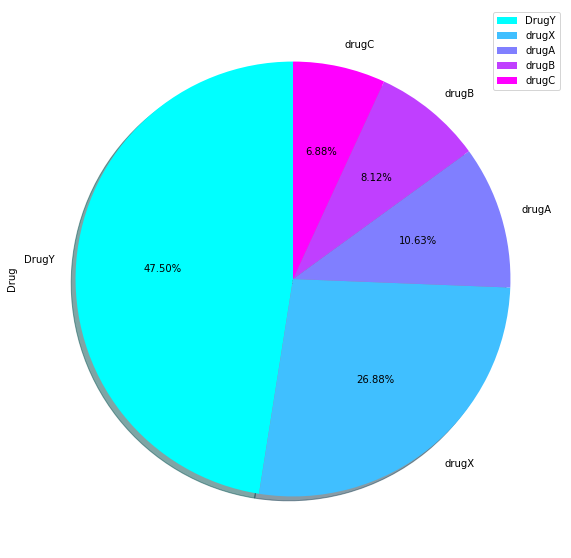

In [60]:
data['Drug'].value_counts().plot(kind='pie',autopct='%3.2f%%',figsize=[20,10],shadow=True,
                                    startangle=90, cmap='cool', legend=True)

In [61]:
data['Drug'].value_counts()

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

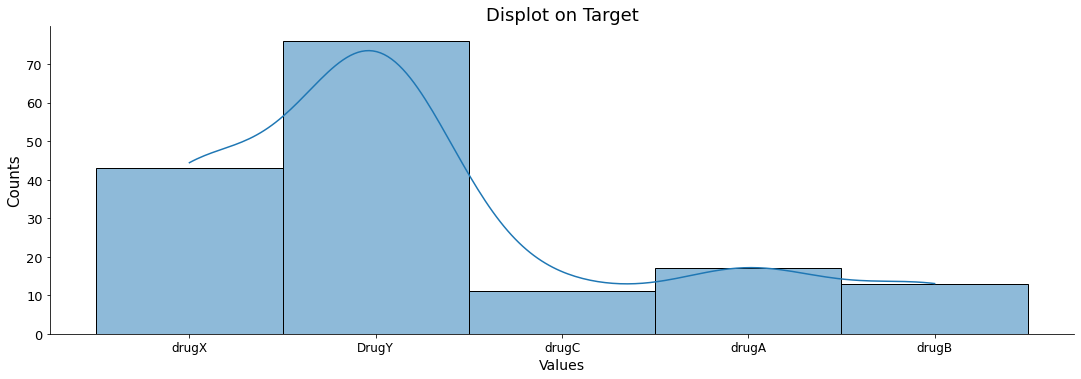

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plot a displot on the Target Variable
sns.displot(x="Drug", data=data, kde=True, aspect=3)

#Adding some cosmetics
plt.xticks(size=12)
plt.yticks(size=13)
plt.xlabel(xlabel='Values',size=14)
plt.ylabel(ylabel='Counts',size=15)
plt.title(label='Displot on Target',size=18)
#plt.grid(b=True)

# Display the figure
plt.show

# Seperating the Categorical and Numerical Columns

In [63]:
#creating the Categorical data
data_cat = data[['Sex', 'BP', 'Cholesterol']]
data_cat.head(5)

,Sex,BP,Cholesterol
0,F,LOW,NORMAL
1,M,NORMAL,HIGH
2,F,NORMAL,NORMAL
3,F,LOW,HIGH
4,M,NORMAL,HIGH


In [64]:
#creating Numerical data
data_int = data.drop(['Sex', 'BP', 'Cholesterol','Id'], axis=1)
data_int.head(5)

,Age,Na_to_K,Drug
0,32,10.840,drugX
1,52,9.894,drugX
2,39,9.709,drugX
3,33,33.486,DrugY
4,34,22.456,DrugY


### Let's do a labeling for all the Categorical Columns for easy understanding to machine.

In [65]:
from sklearn.preprocessing import LabelEncoder
data_cat = data_cat.apply(LabelEncoder().fit_transform)
data_cat

,Sex,BP,Cholesterol
0,0,1,1
1,1,2,0
2,0,2,1
3,0,1,0
4,1,2,0
...,...,...,...
155,1,2,0
156,0,2,0
157,0,0,0
158,0,2,0


# Merging the Categorical and Numerical data

In [66]:
data_final = pd.concat([data_cat, data_int],axis=1)
data_final

,Sex,BP,Cholesterol,Age,Na_to_K,Drug
0,0,1,1,32,10.840,drugX
1,1,2,0,52,9.894,drugX
2,0,2,1,39,9.709,drugX
3,0,1,0,33,33.486,DrugY
4,1,2,0,34,22.456,DrugY
...,...,...,...,...,...,...
155,1,2,0,22,11.953,drugX
156,0,2,0,50,12.703,drugX
157,0,0,0,29,29.450,DrugY
158,0,2,0,67,15.891,DrugY


In [67]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          160 non-null    int32  
 1   BP           160 non-null    int32  
 2   Cholesterol  160 non-null    int32  
 3   Age          160 non-null    int64  
 4   Na_to_K      160 non-null    float64
 5   Drug         160 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 5.8+ KB


In [68]:
import seaborn as sns 

### Let's check the correlation between the categories.

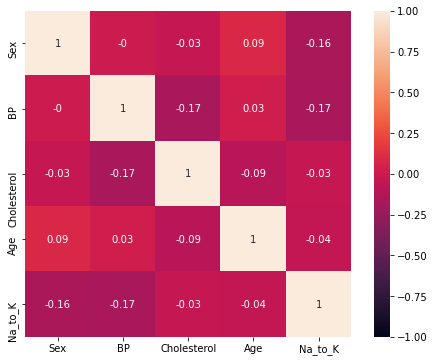

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(round(data_final.corr(),2), annot=True, vmin=-1, vmax=1, square=True)
plt.show()

In [70]:
x = data_final.drop('Drug', axis = 1)   #Feature
y = data_final[['Drug']]         #Target
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (160, 5)
Shape of y: (160, 1)


In [71]:
x

,Sex,BP,Cholesterol,Age,Na_to_K
0,0,1,1,32,10.840
1,1,2,0,52,9.894
2,0,2,1,39,9.709
3,0,1,0,33,33.486
4,1,2,0,34,22.456
...,...,...,...,...,...
155,1,2,0,22,11.953
156,0,2,0,50,12.703
157,0,0,0,29,29.450
158,0,2,0,67,15.891


In [72]:
y

,Drug
0,drugX
1,drugX
2,drugX
3,DrugY
4,DrugY
...,...
155,drugX
156,drugX
157,DrugY
158,DrugY


In [73]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (128, 5)
y_train shape:  (128, 1)
X_test shape:  (32, 5)
y_test shape:  (32, 1)


# **Model Development & Evaluation**
---

- In this section we will **develop Decision Tree model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall** and **Accuracy** scores.

- We will do **hyperparameter tuning** and see if the scores improves. 

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(x_train, y_train)

# Predicting training and testing labels
y_train_pred_count = dtc.predict(x_train)
y_test_pred_count = dtc.predict(x_test)

In [75]:
print(y_train_pred_count)
print(y_test_pred_count)

['DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugA' 'drugC'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'drugC' 'drugA' 'DrugY' 'drugB' 'drugA'
 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugA' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'drugA' 'DrugY' 'DrugY' 'drugA' 'drugA' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'drugC' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY'
 'drugB' 'drugX' 'drugX' 'drugB' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'drugB' 'DrugY'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugA' 'drugA'
 'drugX' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'drugC' 'drugC' 'drugX' 'drugA' 'drugA' 'D

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred_count)

array([[61,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 34]], dtype=int64)

In [77]:
confusion_matrix(y_test, y_test_pred_count)

array([[15,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        61
       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00        10
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        34

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

                    Testing Report           
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      

<a name = Section81></a>
### **Baseline Model Development & Evaluation**

- Here we will develop random forest classifier using default setting.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=8, n_jobs=-1,class_weight='balanced')
rfc.fit(x_train, y_train)

# Predicting training and testing labels
y_train_pred_count_rfc = rfc.predict(x_train)
y_test_pred_count_rfc = rfc.predict(x_test)

In [80]:
print(y_train_pred_count_rfc)
print(y_test_pred_count_rfc)

['DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugA' 'drugC'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'drugC' 'drugA' 'DrugY' 'drugB' 'drugA'
 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugA' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'drugA' 'DrugY' 'DrugY' 'drugA' 'drugA' 'drugB' 'DrugY' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'drugC' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY'
 'drugB' 'drugX' 'drugX' 'drugB' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'drugC' 'DrugY' 'drugX' 'DrugY' 'drugC' 'DrugY' 'DrugY' 'drugB' 'DrugY'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugX' 'drugA' 'drugA'
 'drugX' 'DrugY' 'drugX' 'drugB' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX'
 'drugX' 'drugC' 'drugC' 'drugX' 'drugA' 'drugA' 'D

In [81]:
from sklearn.metrics import classification_report
train_report_rfc = classification_report(y_train, y_train_pred_count_rfc)
test_report_rfc = classification_report(y_test, y_test_pred_count_rfc)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        61
       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00        10
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        34

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

                    Testing Report           
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      

In [82]:
scores_rf = cross_val_score(rfc,x_train,y_train, cv=5, scoring = 'accuracy' )

In [83]:
print(scores_rf)

[0.96153846 0.92307692 0.96153846 1.         0.96      ]


In [84]:
import numpy as np
print(np.mean(scores_rf))

0.9612307692307691


In [85]:
scores_rf_f1 = cross_val_score(rfc,x_train,y_train, cv=5, scoring = 'f1_macro' )

In [86]:
print(scores_rf_f1)

[0.97441077 0.775      0.92       1.         0.9047619 ]


In [87]:
print(np.mean(scores_rf_f1))

0.9148345358345358


In [88]:
scores_rf_test_acc = cross_val_score(rfc,x_test,y_test, cv=5, scoring = 'accuracy' )

In [89]:
print(np.mean(scores_rf_test_acc))

0.6904761904761905


# Extracting Test Dataset

In [90]:
data_test = pd.read_csv('C:/Users/abhay/Downloads/Drug-Prediction1/drug_test.csv')
print('Data Shape:', data_test.shape)
data_test.head(10)

Data Shape: (40, 6)


,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542
5,115,51,M,HIGH,HIGH,18.295
6,69,18,F,HIGH,NORMAL,24.276
7,170,28,F,NORMAL,HIGH,12.879
8,174,42,M,HIGH,NORMAL,12.766
9,45,66,F,NORMAL,NORMAL,8.107


In [91]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [92]:
data_test_cat = data_test[['Sex', 'BP', 'Cholesterol']]
data_test_cat.head(5)

,Sex,BP,Cholesterol
0,M,LOW,NORMAL
1,F,HIGH,NORMAL
2,F,NORMAL,NORMAL
3,F,LOW,HIGH
4,M,LOW,NORMAL


In [93]:
data_test_int = data_test[['Age', 'Na_to_K']]
data_test_int.head(5)

,Age,Na_to_K
0,36,11.424
1,16,15.516
2,18,8.750
3,59,10.444
4,47,33.542


In [94]:
from sklearn.preprocessing import LabelEncoder
data_test_cat = data_test_cat.apply(LabelEncoder().fit_transform)
data_test_cat.head(5)

,Sex,BP,Cholesterol
0,1,1,1
1,0,0,1
2,0,2,1
3,0,1,0
4,1,1,1


In [95]:
data_test_final = pd.concat([data_test_cat, data_test_int],axis=1)
data_test_final.head(5)

,Sex,BP,Cholesterol,Age,Na_to_K
0,1,1,1,36,11.424
1,0,0,1,16,15.516
2,0,2,1,18,8.750
3,0,1,0,59,10.444
4,1,1,1,47,33.542


# Predicting Drug values for Test Data using Trained Model

In [96]:
data_test_pred = rfc.predict(data_test_final)

In [97]:
data_test_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [98]:
data_test_pred = pd.DataFrame(data_test_pred)

In [99]:
data_test_pred.head(5)

,0
0,drugX
1,DrugY
2,drugX
3,drugC
4,DrugY


## Adding ID Column in the Submission File

In [100]:
submission_file = pd.concat([data_test['Id'], data_test_pred], axis = 1)

In [101]:
submission_file.head(5)

,Id,0
0,95,drugX
1,15,DrugY
2,30,drugX
3,158,drugC
4,128,DrugY


In [102]:
submission_file.replace({'drugA' : 3, 'drugB': 4,  'drugC': 2, 'drugX': 0, 'DrugY': 1}, inplace = True)

In [103]:
submission_file.head(5)

,Id,0
0,95,0
1,15,1
2,30,0
3,158,2
4,128,1


In [104]:
submission_file.to_csv('C://Users/abhay/Downloads/Car Price Pred Project/submission_Abhay.csv', header=False, index=False)